In [2]:
import numpy
import matplotlib

%matplotlib inline
import matplotlib.pyplot
matplotlib.rcParams['figure.facecolor'] = 'white'

In [8]:
path = '20181008_155314'
path_lo = '20181008_161103lo'

In [9]:
def plot_all(path, saveto=None, dpi=None):
    
    sis_list = ['2l', '2r', '3l', '3r',
                '4l', '4r', '5l', '5r', 
                '1lu', '1ll', '1ru', '1rl']
    
    voltage = numpy.loadtxt('./' + path + '/sis_vol.txt')
    current = numpy.loadtxt('./' + path + '/sis_cur.txt')
    voltage_lo = numpy.loadtxt('./' + path_lo + '/sis_vol.txt')
    current_lo = numpy.loadtxt('./' + path_lo + '/sis_cur.txt')
    
    ncol = 4
    nrow = 3
    nax = ncol * nrow
    
    matplotlib.rcParams['savefig.dpi'] = 50
    matplotlib.rcParams['font.size'] = 24
    
    figsize = (ncol * 8, nrow * 8)
    
    fig = matplotlib.pyplot.figure(figsize=figsize)
    ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]
    
    for _ax, sis, _ in zip(ax, sis_list, range(len(sis_list))):
        _ax.plot(voltage[:, _], current[:, _], '.', label='without LO')
        _ax.plot(voltage_lo[:, _], current_lo[:, _], '.', label='wiht LO')
        _ax.grid()
        _ax.set_xlabel('voltage [mV]')
        _ax.set_ylabel('current [uA]')
        _ax.set_title('{}'.format(sis))
        _ax.legend()
        
    fig.subplots_adjust(wspace=0.4, hspace=0.4)
    fig.suptitle(path + '\nNASCO IV MEASUREMENT on ROS', size=48)
    
    matplotlib.pyplot.savefig('./fig/{}.png'.format(path))
        
    matplotlib.pyplot.show()

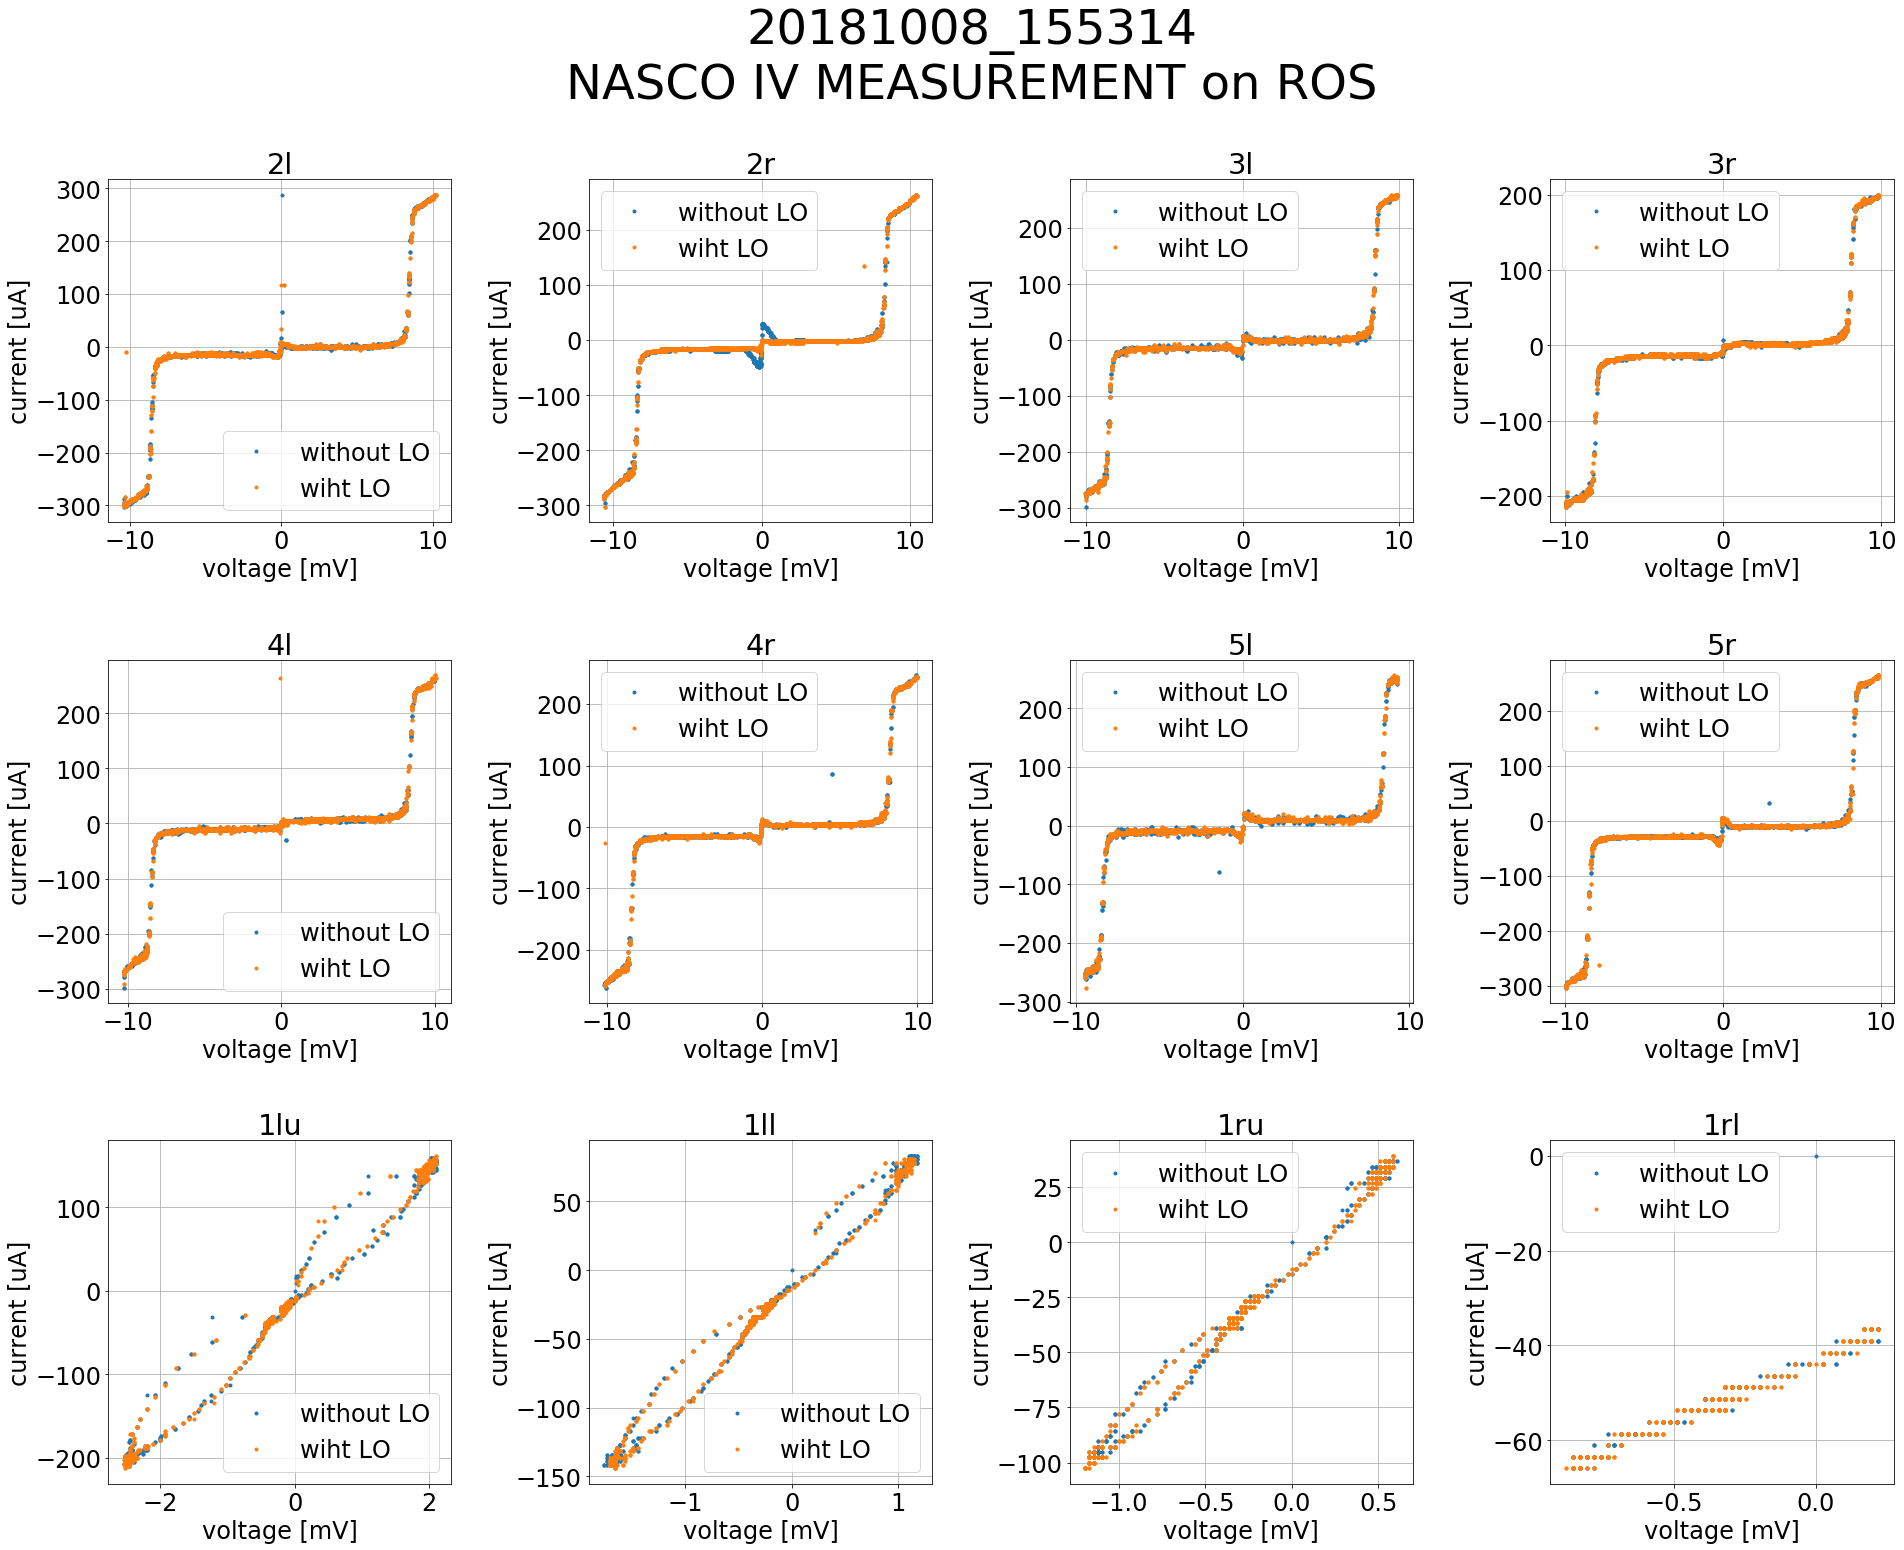

In [10]:
plot_all(path)